<a href="https://colab.research.google.com/github/jhkr1/PythonML/blob/main/03_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03.Polynomial Regression

## 공부 시간에 따른 시험 점수(우등생)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/PythonMLWokrspace/ScikitLearn/PolynomialRegressionData.csv')

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### 3-1. 단순 선형 회귀(Simple Linear Regression)

In [4]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y) # 전체 데이터로 학습 진행

LinearRegression()

### 데이터 시각화(전체)

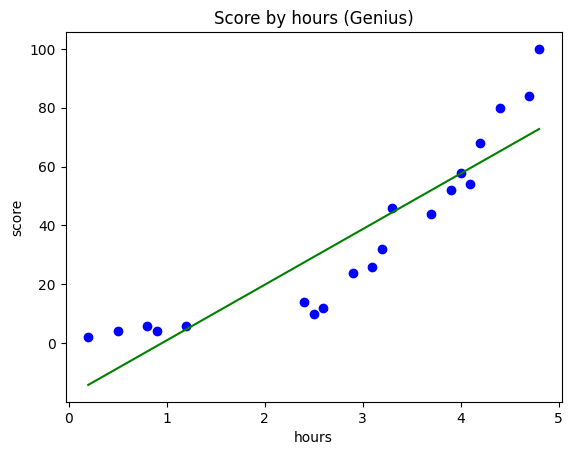

In [5]:
plt.scatter(X, y, color = 'blue') # 산점도
plt.plot(X, reg.predict(X), color = 'green') # 회귀선
plt.title("Score by hours (Genius)") # 제목
plt.xlabel('hours') # X축 이름
plt.ylabel('score') # Y축 이름
plt.show()

In [6]:
reg.score(X, y) # 전체 데이터를 통한 모델 평가

0.8169296513411765

## 3-2. 다항 회귀(polynomial Regression)

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) # 4차 다항식
X_poly = poly_reg.fit_transform(X)

In [8]:
X_poly[:5] # x의 0승, x의 1승, x의 2승
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [9]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) # 변환된 X, y에 대해 학습

LinearRegression()

### 데이터 시각화 (변환된 X와 y)

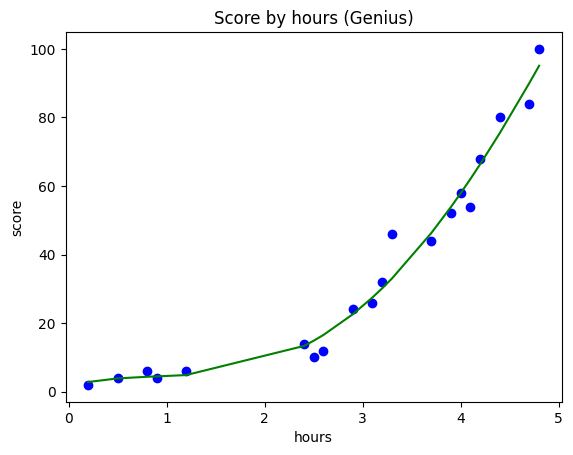

In [11]:
plt.scatter(X, y, color = 'blue') # 산점도
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color = 'green')
plt.title("Score by hours (Genius)") # 제목
plt.xlabel('hours') # X축 이름
plt.ylabel('score') # Y축 이름
plt.show()

In [12]:
X_range = np.arange(min(X), max(X), 0.1) # X의 최솟값에서 최댓값까지의 범위를 0.1단위로 잘라서 데이터를 생성
X_range

<ipython-input-12-57693abb321e>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1) # X의 최솟값에서 최댓값까지의 범위를 0.1단위로 잘라서 데이터를 생성


array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [13]:
X_range.shape

(46,)

In [14]:
X.shape

(20, 1)

In [15]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [16]:
X_range = X_range.reshape(-1,1) # == X_range.reshape(len(X_range), 1)

In [17]:
X_range.shape

(46, 1)

In [18]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

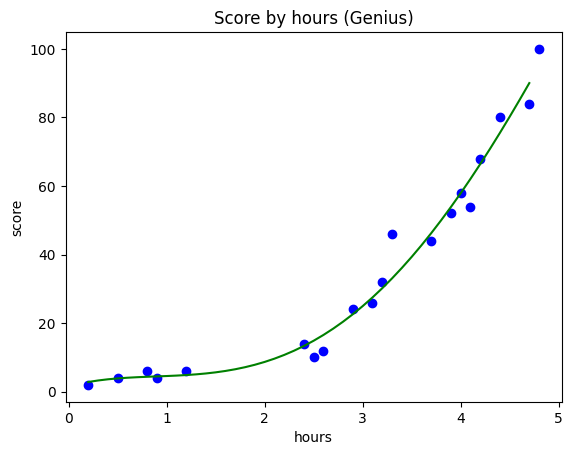

In [19]:
plt.scatter(X, y, color = 'blue') # 산점도
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color = 'green')
plt.title("Score by hours (Genius)") # 제목
plt.xlabel('hours') # X축 이름
plt.ylabel('score') # Y축 이름
plt.show()

### 공부 시간에 따른 시험 성적 예측

In [20]:
reg.predict([[2]]) # 2시간을 공부했을 때 선형 회귀 모형의 예측값

array([19.85348988])

In [23]:
lin_reg.predict(poly_reg.fit_transform([[2]]))# 2시간을 공부했을 때 다항 회귀 모형의 예측값

array([8.70559135])

In [25]:
lin_reg.score(poly_reg.fit_transform(X), y)

0.9782775579000046